In [12]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('./Data/fasting_success_one_person.csv')
df.head()

,days,tiredness,prayer_time,hydration,temperature,is_friday,days_until_eid,fast
0,1,3.745401,42.339518,3.886773,22.989856,0,29,0
1,2,9.507143,22.673586,2.713490,37.831120,0,28,0
2,3,7.319939,17.927322,8.287375,39.019626,0,27,0
3,4,5.986585,57.699849,3.567533,34.031930,0,26,0
4,5,1.560186,58.453441,2.809345,39.274179,1,25,0


In [14]:
X = df[['tiredness','prayer_time','hydration','temperature','is_friday','days_until_eid']]
y = df['fast']

In [15]:
df.tail()

,days,tiredness,prayer_time,hydration,temperature,is_friday,days_until_eid,fast
25,26,7.851760,56.484341,3.251833,41.786515,1,4,0
26,27,1.996738,18.982163,7.296062,40.091802,0,3,0
27,28,5.142344,23.819229,6.375575,24.664251,0,2,1
28,29,5.924146,17.035228,8.872127,42.313975,0,1,0
29,30,0.464504,29.639865,4.722149,33.483556,0,0,0


In [16]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


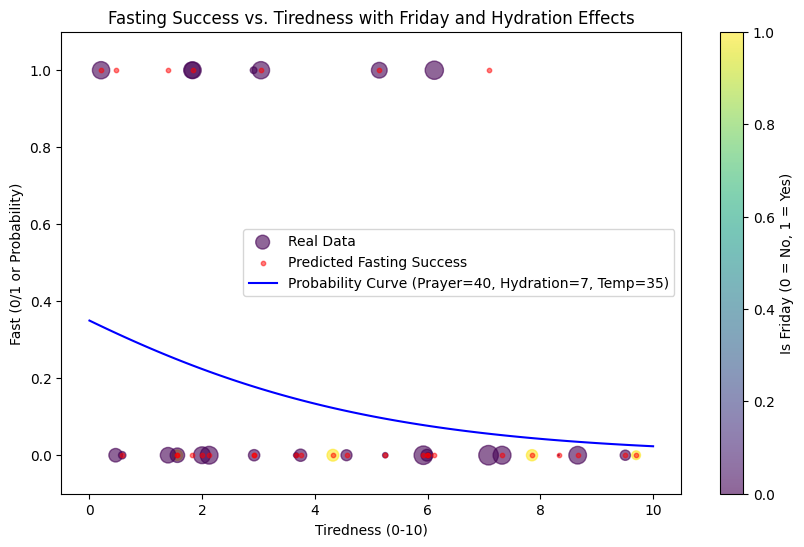

In [17]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df["tiredness"],
    df["fast"],
    c=df["is_friday"],
    s=df["hydration"] * 20,
    alpha=0.6,
    cmap="viridis",
    label="Real Data"
)
plt.scatter(
    df["tiredness"],
    model.predict(X),
    color="red",
    s=10,
    label="Predicted Fasting Success",
    alpha=0.5
)
tiredness_range = np.linspace(0, 10, 100)
X_line = np.array([tiredness_range, np.full(100, 40), np.full(100, 7), np.full(100, 35), np.zeros(100), np.full(100, 15)]).T
plt.plot(tiredness_range, model.predict_proba(X_line)[:, 1], "b-", label="Probability Curve (Prayer=40, Hydration=7, Temp=35)")
plt.xlabel("Tiredness (0-10)")
plt.ylabel("Fast (0/1 or Probability)")
plt.title("Fasting Success vs. Tiredness with Friday and Hydration Effects")
plt.colorbar(scatter, label="Is Friday (0 = No, 1 = Yes)")
plt.legend()
plt.ylim(-0.1, 1.1)
plt.show()